# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [85]:
import os
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pylab as plt


warnings.filterwarnings('ignore')
PUIdata = os.getenv('PUIDATA')

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [86]:
# Load dataset

#data311 = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv')
data311 = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9',
                     usecols = ['Unique Key','Agency', 'Complaint Type',
                                'Community Board', 'Borough','Created Date', 'Closed Date', 'Resolution Description'])

In [87]:
data311.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Resolution Description,Community Board,Borough
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Street Condition,NaN,13 BROOKLYN,BROOKLYN
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,Opinion for the Mayor,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Root/Sewer/Sidewalk Condition,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,Illegal Parking,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,Benefit Card Replacement,The Human Resources Administration received yo...,0 Unspecified,Unspecified


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [88]:
data311.shape

(10187766, 8)

In [89]:
data311.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Complaint Type', u'Resolution Description', u'Community Board',
       u'Borough'],
      dtype='object')

In [90]:
# Check if all Boroughs and Community Districts are represented in the Data 
data311.Borough.value_counts()

BROOKLYN         2831932
QUEENS           2189760
MANHATTAN        1900005
BRONX            1665625
Unspecified      1109446
STATEN ISLAND     490998
Name: Borough, dtype: int64

#### We notice above that all five Boroughs are represented in the data

In [91]:
data311['Community Board'].value_counts().index

Index([u'0 Unspecified', u'12 MANHATTAN', u'Unspecified BROOKLYN',
       u'12 QUEENS', u'Unspecified MANHATTAN', u'Unspecified QUEENS',
       u'Unspecified BRONX', u'03 BROOKLYN', u'07 QUEENS', u'17 BROOKLYN',
       u'05 BROOKLYN', u'14 BROOKLYN', u'07 BRONX', u'01 BROOKLYN',
       u'01 STATEN ISLAND', u'04 BRONX', u'01 QUEENS', u'05 QUEENS',
       u'12 BRONX', u'13 QUEENS', u'05 BRONX', u'18 BROOKLYN', u'07 MANHATTAN',
       u'09 QUEENS', u'12 BROOKLYN', u'03 MANHATTAN', u'08 MANHATTAN',
       u'09 BRONX', u'15 BROOKLYN', u'05 MANHATTAN', u'08 BROOKLYN',
       u'11 BROOKLYN', u'04 BROOKLYN', u'10 MANHATTAN', u'03 STATEN ISLAND',
       u'09 BROOKLYN', u'02 MANHATTAN', u'04 MANHATTAN', u'10 QUEENS',
       u'09 MANHATTAN', u'08 QUEENS', u'11 BRONX', u'03 QUEENS',
       u'02 STATEN ISLAND', u'02 BROOKLYN', u'02 QUEENS', u'06 BROOKLYN',
       u'10 BROOKLYN', u'07 BROOKLYN', u'06 MANHATTAN', u'14 QUEENS',
       u'11 QUEENS', u'06 BRONX', u'04 QUEENS', u'10 BRONX', u'11 MANHATTA

In [92]:
commuBoard = data311['Community Board'].value_counts().index
commuDF = pd.DataFrame([i.split(' ',2) for i in commuBoard])
commuDF.iloc[:,1].value_counts()

# Total community districts: 59 
# Brooklyn: 18
# Queens: 14
# The Bronx: 12
# Manhattan: 12
# Staten Island: 3
# Source: https://en.wikipedia.org/wiki/Community_boards_of_New_York_City

BROOKLYN       21
QUEENS         20
BRONX          16
MANHATTAN      14
STATEN          5
Unspecified     1
Name: 1, dtype: int64

In [93]:
commuDF.columns = ['id','boro','extra']

In [94]:
commuDF.loc[commuDF.boro == 'STATEN'].sort_values('id')

,id,boro,extra
14,01,STATEN,ISLAND
43,02,STATEN,ISLAND
34,03,STATEN,ISLAND
72,95,STATEN,ISLAND
64,Unspecified,STATEN,ISLAND


In [95]:
commuDF.loc[commuDF.boro == 'MANHATTAN'].sort_values('id')

,id,boro,extra
59,01,MANHATTAN,None
36,02,MANHATTAN,None
25,03,MANHATTAN,None
37,04,MANHATTAN,None
29,05,MANHATTAN,None
49,06,MANHATTAN,None
22,07,MANHATTAN,None
26,08,MANHATTAN,None
39,09,MANHATTAN,None
33,10,MANHATTAN,None


In [96]:
commuDF.loc[commuDF.boro == 'BROOKLYN'].sort_values('id')

,id,boro,extra
13,01,BROOKLYN,None
44,02,BROOKLYN,None
7,03,BROOKLYN,None
32,04,BROOKLYN,None
10,05,BROOKLYN,None
46,06,BROOKLYN,None
48,07,BROOKLYN,None
30,08,BROOKLYN,None
35,09,BROOKLYN,None
47,10,BROOKLYN,None


In [97]:
commuDF.loc[commuDF.boro == 'BRONX'].sort_values('id')

,id,boro,extra
61,01,BRONX,None
63,02,BRONX,None
60,03,BRONX,None
15,04,BRONX,None
20,05,BRONX,None
52,06,BRONX,None
12,07,BRONX,None
56,08,BRONX,None
27,09,BRONX,None
54,10,BRONX,None


In [98]:
commuDF.loc[commuDF.boro == 'QUEENS',].sort_values('id')

,id,boro,extra
16,01,QUEENS,None
45,02,QUEENS,None
42,03,QUEENS,None
53,04,QUEENS,None
17,05,QUEENS,None
57,06,QUEENS,None
8,07,QUEENS,None
40,08,QUEENS,None
23,09,QUEENS,None
38,10,QUEENS,None


#### We notice that all community districts are included in the data. Also, we notice that in all Boroughs there are misreported community board numbers. In the following steps we are trying to address the issue.

In [99]:
# How many unique values do we have? 
#how do we consider dates for duplicates??
uniques = data311.drop_duplicates()

In [100]:
len(data311)

10187766

In [101]:
len(uniques)

10187766

In [102]:
print "The dataset has:", uniques.shape[0], 'unique values' 
print 'The dataset has:', 2*(data311.shape[0] - uniques.shape[0]), 'duplicate values'

The dataset has: 10187766 unique values
The dataset has: 0 duplicate values


In [103]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

In [104]:
# Check for duplicates? Are these plausible?
duplicates = data311[data311.duplicated(keep=False)] 
duplicates.shape

(0, 8)

In [106]:
# What about missing values? Can you detect any patterns? 
omitted = data311.drop('Closed Date', 1)
null_values = omitted[pd.isnull(omitted).any(axis=1)]

In [107]:
data311.head(100)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Resolution Description,Community Board,Borough
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Street Condition,NaN,13 BROOKLYN,BROOKLYN
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,Opinion for the Mayor,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Root/Sewer/Sidewalk Condition,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,Illegal Parking,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,Benefit Card Replacement,The Human Resources Administration received yo...,0 Unspecified,Unspecified
5,31914148,11/05/2015 01:55:55 AM,NaN,DOT,Highway Condition,The Department of Transportation requires 10 d...,02 STATEN ISLAND,STATEN ISLAND
6,31912764,11/05/2015 01:55:37 AM,NaN,DPR,Agency Issues,Your comments have been submitted to the Depar...,0 Unspecified,Unspecified
7,31912611,11/05/2015 01:47:12 AM,NaN,NYPD,Noise - Commercial,Your complaint has been forwarded to the New Y...,08 MANHATTAN,MANHATTAN
8,31913909,11/05/2015 01:39:31 AM,11/05/2015 02:35:44 AM,NYPD,Noise - Commercial,The Police Department responded to the complai...,06 BROOKLYN,BROOKLYN
9,31914856,11/05/2015 01:38:35 AM,11/05/2015 02:33:33 AM,NYPD,Noise - Commercial,The Police Department responded to the complai...,06 BROOKLYN,BROOKLYN


In [108]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

In [109]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

markerQueens = data311['Community Board'].str.contains('8[0-9] QUEENS')
#80,81,82,83,84
markerBrooklyn = data311['Community Board'].str.contains('5[0-9] BROOKLYN')
#55,56
markerBronx = data311['Community Board'].str.contains('2[0-9] BRONX')
#26,27,28
markerManhattan = data311['Community Board'] == '64 MANHATTAN'
#64
markerStaten = data311['Community Board'] == '95 STATEN ISLAND'
#95
markerUnsp = data311['Community Board'].str.contains('Unspecified')

makgerGeneral = (~markerQueens) & (~markerBronx) & (~markerBrooklyn) & (~markerManhattan) & (~markerStaten) & (~markerUnsp)

In [110]:
# Drop the marked districts
cleanData = data311.loc[makgerGeneral,]
cleanData.shape

(8110945, 8)

In [111]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
cleanData[['Unique Key','Community Board']].groupby('Community Board').count()

,Unique Key
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182713
02 BRONX,60257
02 BROOKLYN,121022
02 MANHATTAN,133860
02 QUEENS,114333


In [112]:
# Safe reduced data frame (Community District level)
compByCommDict = cleanData[['Unique Key','Community Board']].groupby('Community Board').count()
compByCommDict.head()

,Unique Key
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182713


In [113]:
complaints_311 = compByCommDict.reset_index()
complaints_311.columns = [['Community Board', 'Counts']]
complaints_311.head()

,Community Board,Counts
0,01 BRONX,74631
1,01 BROOKLYN,185057
2,01 MANHATTAN,77974
3,01 QUEENS,171484
4,01 STATEN ISLAND,182713


In [114]:
compByCommDict['Unique Key'].sum()

8110945

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [115]:
# Population by Community District
os.system("curl -O http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv" )
os.system("mv " + "Final_Demographics.csv " + os.getenv("PUIDATA"))
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [116]:
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [117]:
# Check variables in file

In [118]:
pop_vars = df_pop.columns
for var in pop_vars:
    print var

FIPS
cd_id
Total Population
Population Density (per sq. mile)
% Total Population: Male
% Total Population: 18 to 24 Years
% Total Population: 25 to 34 Years
% Total Population: 35 to 44 Years
% Population 5 Years And Over: Speak Only English
% Population 5 Years And Over: Spanish or Spanish Creole
% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"
% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"
Population 25 Years and over:
Population 25 Years and over: Less Than High School
Population 25 Years and over: High School Graduate (includes equivalency)
Population 25 Years and over: Some college
Population 25 Years and over: Bachelor's degree
Population 25 Years and over: Master's degree
Population 25 Years and over: Professional school degree
Population 25 Years and over: Doctorate degree
% Population 25 Years and over: Less Than High School
% Population 25 Years and over: High School Graduate (includes equivalen

In [119]:
# How many community districts are in file? 

In [120]:
pop_commdist = df_pop['cd_id'].value_counts().index

In [121]:
pop_commdist

Index([u'BK08', u'MN01', u'BX11', u'SI02', u'QN11', u'BX12', u'QN13', u'QN12',
       u'QN14', u'MN08', u'MN09', u'SI03', u'MN03', u'SI01', u'MN06', u'BK16',
       u'MN07', u'MN04', u'MN05', u'BX05', u'BX04', u'BX07', u'BX06', u'BX01',
       u'BX03', u'BX02', u'QN09', u'BX09', u'BK17', u'BX10', u'BK09', u'QN04',
       u'BK06', u'BK07', u'BK04', u'BK05', u'BK02', u'BK03', u'BK01', u'MN10',
       u'QN08', u'MN12', u'QN06', u'QN07', u'QN05', u'BK14', u'QN02', u'QN03',
       u'QN01', u'MN02', u'QN10', u'MN11111', u'BK18', u'BK11', u'BK10',
       u'BK13', u'BK12', u'BK15', u'BX08'],
      dtype='object')

In [122]:
print "There are",len(pop_commdist), 'community districts in the dataset'

There are 59 community districts in the dataset


In [123]:
df_pop.cd_id = df_pop.cd_id.str.replace('MN11111', 'MN11')

#### The community districts seem to be reported correctly in this dataset.

In [124]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
df_popred = df_pop[['cd_id','Population Density (per sq. mile)','% Total Population: Male',
                    'Median household income (In 2014 Inflation Adjusted Dollars)',
                   '% Total Population: 18 to 24 Years', '% Total Population: 25 to 34 Years', 
                    '% Total Population: 35 to 44 Years']]

In [125]:
# Save data frame

In [126]:
# Infrastructure by Community District
os.system("curl -O http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv" )
os.system("mv " + "ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv " + os.getenv("PUIDATA"))
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [127]:
df_infr.head(3)

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350


In [128]:
df_infr.shape

(59, 31)

In [129]:
# Check variables in file
infr_vars = df_infr.columns
for var in infr_vars:
    print var

FIPS
Geographic Identifier
Qualifying Name
Households
Households: With An Internet Subscription
Households: Dial-Up Alone
Households: Dsl
Households: With Mobile Broadband
Households: Without Mobile Broadband
Households: Cable Modem
Households: With Mobile Broadband.1
Households: Without Mobile Broadband.1
Households: Fiber-Optic
Households: With Mobile Broadband.2
Households: Without Mobile Broadband.2
Households: Satellite Internet Service
Households: With Mobile Broadband.3
Households: Without Mobile Broadband.3
Households: Two or More Fixed Broadband Types, or Other
Households: With Mobile Broadband.4
Households: Without Mobile Broadband.4
Households: Mobile Broadband Alone or With Dialup
Households: Internet Access Without A Subscription
Households: No Internet Access
% Households: With An Internet Subscription
Households.1
Households: Has A Computer
Households: With Dial-Up Internet Subscription Alone
Households: With A Broadband Internet Subscription
Households: Without An Inter

In [130]:
# How many community districts are in file? 
infr_commdist = df_infr['Qualifying Name'].value_counts().index
infr_commdist

Index([u'NYC-Bronx Community District 3 & 6--Belmont, New York',
       u'NYC-Manhattan Community District 4 & 5--Chelsea, New York',
       u'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       u'NYC-Manhattan Community District 1 & 2--Battery Park City, New York',
       u'NYC-Bronx Community District 9--Castle Hill, New York',
       u'NYC-Brooklyn Community District 16--Brownsville & Ocean Hill PUMA, New York',
       u'NYC-Brooklyn Community District 8--Crown Heights North & Prospect Heights PUMA, New York',
       u'NYC-Queens Community District 12--Jamaica, New York',
       u'NYC-Queens Community District 4--Elmhurst & South Corona PUMA, New York',
       u'NYC-Brooklyn Community District 4--Bushwick PUMA, New York',
       u'NYC-Brooklyn Community District 11--Bensonhurst & Bath Beach PUMA, New York',
       u'NYC-Manhattan Community District 8--Upper East Side PUMA, New York',
       u'NYC-Bronx Community District 5--Morris Heights, New York',
       u'NYC-Manh

In [131]:
print "There are",len(infr_commdist), 'community districts in the dataset'

There are 55 community districts in the dataset


#### We observe that there are 55 unique districts in the dataset. A closer look in the data reveals that 4 identifiers account for 2 districts (e.g.  NYC-Bronx Community District 3 & 6)

In [132]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

# Aggregate internet type by high and low connections

# Save data frame

df_infrred = pd.DataFrame() 

df_infrred['Qualifying Name'] = df_infr['Qualifying Name']
df_infrred['% Households: With An Internet Subscription'] = df_infr['% Households: With An Internet Subscription']

df_infrred['% with mobile'] = (df_infr['Households: With Mobile Broadband'] + 
                               df_infr['Households: With Mobile Broadband.1'] +
                               df_infr['Households: With Mobile Broadband.2'] + 
                               df_infr['Households: With Mobile Broadband.3'] + 
                               df_infr['Households: With Mobile Broadband.4'])/df_infr.Households*100

df_infrred['% without mobile'] = (df_infr['Households: Without Mobile Broadband'] + 
                                  df_infr['Households: Without Mobile Broadband.1'] +
                                  df_infr['Households: Without Mobile Broadband.2'] + 
                                  df_infr['Households: Without Mobile Broadband.3'] + 
                                  df_infr['Households: Without Mobile Broadband.4'])/df_infr.Households*100

df_infrred['% fast connection'] = (df_infr['Households: Dsl'] + df_infr['Households: Cable Modem'] +
                                   df_infr['Households: Fiber-Optic'] + 
                                   df_infr['Households: Satellite Internet Service'] + 
                                   df_infr['Households: Two or More Fixed Broadband Types, or Other'])/df_infr.Households*100

df_infrred['% slow connection'] = (df_infr['Households: Dial-Up Alone'] + 
                                   df_infr['Households: Mobile Broadband Alone or With Dialup'] +
                                   df_infr['Households: Internet Access Without A Subscription'])/df_infr.Households*100

df_infrred['Qualifying Name'] = df_infr['Qualifying Name']
df_infrred.head()
#df_infrred['Dial-Up Alone %'] = df_infrred['Households: Dial-Up Alone']/df_infrred.Households
#df_infrred['Broadband Internet  %'] = df_infrred['Households: With A Broadband Internet Subscription']/df_infrred.Households

,Qualifying Name,% Households: With An Internet Subscription,% with mobile,% without mobile,% fast connection,% slow connection
0,"NYC-Bronx Community District 8--Riverdale, New...",75.64,36.538599,32.886880,69.425479,11.254907
1,"NYC-Bronx Community District 12--Wakefield, Ne...",71.92,23.390587,46.065135,69.455722,6.685255
2,"NYC-Bronx Community District 10--Co-op City, N...",69.56,24.282678,43.585547,67.868225,7.819341
3,NYC-Bronx Community District 11--Pelham Parkwa...,71.24,23.925916,44.773162,68.699078,8.601576
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",61.68,25.899993,33.225033,59.125026,8.313642


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

### Harmonize identifier of dataframe 1

In [133]:
complaints_311.head(3)

,Community Board,Counts
0,01 BRONX,74631
1,01 BROOKLYN,185057
2,01 MANHATTAN,77974


In [134]:
names_311 = pd.DataFrame(complaints_311['Community Board'].str.split(' ', 1).tolist(), columns = ['number','borough'])

In [135]:
names_311.borough = names_311.borough.str.replace('BRONX', 'BX')
names_311.borough = names_311.borough.str.replace('BROOKLYN', 'BK')
names_311.borough = names_311.borough.str.replace('MANHATTAN', 'MN')
names_311.borough = names_311.borough.str.replace('QUEENS', 'QN')
names_311.borough = names_311.borough.str.replace('STATEN ISLAND', 'SI')

In [136]:
names_311.head(3)

,number,borough
0,01,BX
1,01,BK
2,01,MN


In [137]:
names_311['name'] = names_311.borough + names_311.number

In [138]:
complaints_311['harm_name'] = names_311['name']

In [139]:
complaints_311.head(3)

,Community Board,Counts,harm_name
0,01 BRONX,74631,BX01
1,01 BROOKLYN,185057,BK01
2,01 MANHATTAN,77974,MN01


### Harmonize identifier of dataframe 2

In [140]:
df_popred.head(3)

,cd_id,Population Density (per sq. mile),% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars),% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years
0,BX08,31229.95006,46.65,54224,10.73,15.04,11.32
1,BX12,19966.67839,46.35,44906,11.35,14.29,12.57
2,BX10,12913.81703,45.20,54962,8.62,13.74,12.78


In [141]:
df_popred['harm_name'] = df_popred.cd_id
del df_popred['cd_id']

In [142]:
df_popred.head(3)

,Population Density (per sq. mile),% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars),% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,harm_name
0,31229.95006,46.65,54224,10.73,15.04,11.32,BX08
1,19966.67839,46.35,44906,11.35,14.29,12.57,BX12
2,12913.81703,45.20,54962,8.62,13.74,12.78,BX10


### Harmonize identifier of dataframe 3

In [143]:
df_infrred.head()

,Qualifying Name,% Households: With An Internet Subscription,% with mobile,% without mobile,% fast connection,% slow connection
0,"NYC-Bronx Community District 8--Riverdale, New...",75.64,36.538599,32.886880,69.425479,11.254907
1,"NYC-Bronx Community District 12--Wakefield, Ne...",71.92,23.390587,46.065135,69.455722,6.685255
2,"NYC-Bronx Community District 10--Co-op City, N...",69.56,24.282678,43.585547,67.868225,7.819341
3,NYC-Bronx Community District 11--Pelham Parkwa...,71.24,23.925916,44.773162,68.699078,8.601576
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",61.68,25.899993,33.225033,59.125026,8.313642


In [144]:
df_infrred['Qualifying Name'][4] = 'NYC-Bronx Community District 3--Belmont, New York'
df_infrred['Qualifying Name'][5] = 'NYC-Bronx Community District 6--Belmont, New York'
df_infrred['Qualifying Name'][10] = 'NYC-Bronx Community District 1--Hunts Point, New York'
df_infrred['Qualifying Name'][11] = 'NYC-Bronx Community District 2--Belmont, New York'
df_infrred['Qualifying Name'][18] = 'NYC-Manhattan Community District 4--Chelsea, New York'
df_infrred['Qualifying Name'][19] = 'NYC-Manhattan Community District 5--Chelsea, New York'
df_infrred['Qualifying Name'][22] = 'NYC-Manhattan Community District 1--Battery Park City, New York'
df_infrred['Qualifying Name'][23] = 'NYC-Manhattan Community District 2--Battery Park City, New York'

In [145]:
inf_bronx = df_infrred['Qualifying Name'].str.extract('(Bronx)', expand=False)
inf_manh = df_infrred['Qualifying Name'].str.extract('(Manhattan)', expand=False)
inf_staten = df_infrred['Qualifying Name'].str.extract('(Staten)', expand=False)
inf_brooklyn = df_infrred['Qualifying Name'].str.extract('(Brooklyn)', expand=False)
inf_queens = df_infrred['Qualifying Name'].str.extract('(Queens)', expand=False)

inf_bronx.dropna(inplace = True)
inf_manh.dropna(inplace = True)
inf_staten.dropna(inplace = True)
inf_brooklyn.dropna(inplace = True)
inf_queens.dropna(inplace = True)

In [146]:
names_inf = pd.Series()
names_inf = names_inf.append([inf_bronx, inf_manh, inf_staten, inf_brooklyn, inf_queens])

In [147]:
names_inf = names_inf.str.replace('Bronx', 'BX')
names_inf = names_inf.str.replace('Brooklyn', 'BK')
names_inf = names_inf.str.replace('Manhattan', 'MN')
names_inf = names_inf.str.replace('Queens', 'QN')
names_inf = names_inf.str.replace('Staten', 'SI')

In [148]:
inf_num = df_infrred['Qualifying Name'].str.extract('(\d\d)', expand=False)
inf_num_single = df_infrred['Qualifying Name'].str.extract('(\d)', expand=False)

In [149]:
inf_num.fillna(inf_num_single , inplace=True)

In [150]:
for i in range (0,len(inf_num)):
    inf_num[i] = inf_num[i].rjust(2, '0')

In [151]:
harm_names_inf = names_inf + inf_num

In [152]:
df_infrred['harm_name'] = harm_names_inf

In [153]:
df_infrred.head()

,Qualifying Name,% Households: With An Internet Subscription,% with mobile,% without mobile,% fast connection,% slow connection,harm_name
0,"NYC-Bronx Community District 8--Riverdale, New...",75.64,36.538599,32.886880,69.425479,11.254907,BX08
1,"NYC-Bronx Community District 12--Wakefield, Ne...",71.92,23.390587,46.065135,69.455722,6.685255,BX12
2,"NYC-Bronx Community District 10--Co-op City, N...",69.56,24.282678,43.585547,67.868225,7.819341,BX10
3,NYC-Bronx Community District 11--Pelham Parkwa...,71.24,23.925916,44.773162,68.699078,8.601576,BX11
4,"NYC-Bronx Community District 3--Belmont, New York",61.68,25.899993,33.225033,59.125026,8.313642,BX03


### Link the 3 dataframes

In [154]:
df_merged = pd.merge(pd.merge(complaints_311,df_popred,on='harm_name'),df_infrred,on='harm_name')

In [155]:
df_merged.shape

(59, 15)

In [165]:
df_merged.head()

,Community Board,Counts,harm_name,Population Density (per sq. mile),% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars),% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,Qualifying Name,% Households: With An Internet Subscription,% with mobile,% without mobile,% fast connection,% slow connection
0,01 BRONX,74631,BX01,34412.07524,49.63,21116,12.76,18.26,12.04,"NYC-Bronx Community District 1--Hunts Point, N...",62.68,28.700351,32.059167,60.759518,6.541358
1,01 BROOKLYN,185057,BK01,37671.51058,49.93,57818,8.52,29.88,13.70,NYC-Brooklyn Community District 1--Greenpoint ...,74.64,30.982696,39.855533,70.838228,7.688522
2,01 MANHATTAN,77974,MN01,53928.05360,49.00,120190,8.55,28.38,18.14,NYC-Manhattan Community District 1--Battery Pa...,88.95,47.221825,39.430313,86.652139,5.973135
3,01 QUEENS,171484,QN01,35800.75960,49.32,56269,9.26,27.12,15.74,NYC-Queens Community District 1--Astoria & Lon...,81.66,39.183981,40.180575,79.364556,4.687294
4,01 STATEN ISLAND,182713,SI01,12537.60496,49.29,57602,10.93,15.08,12.94,NYC-Staten Island Community District 1--Port R...,76.05,16.811449,57.815849,74.627299,3.581156


#### The dataframe above includes merged information regarding each community district's 311 complaints, demographics and communication infrastructure accessibility

In [156]:
df_sorted = df_merged.sort('harm_name')

In [157]:
df_sorted.reset_index(inplace = True)
del df_sorted['index']

In [158]:
df_sorted.columns

Index([u'Community Board', u'Counts', u'harm_name',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'Median household income (In 2014 Inflation Adjusted Dollars)',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years', u'Qualifying Name',
       u'% Households: With An Internet Subscription', u'% with mobile',
       u'% without mobile', u'% fast connection', u'% slow connection'],
      dtype='object')

In [159]:
df_sorted

,Community Board,Counts,harm_name,Population Density (per sq. mile),% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars),% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,Qualifying Name,% Households: With An Internet Subscription,% with mobile,% without mobile,% fast connection,% slow connection
0,01 BROOKLYN,185057,BK01,37671.510580,49.93,57818,8.52,29.88,13.70,NYC-Brooklyn Community District 1--Greenpoint ...,74.64,30.982696,39.855533,70.838228,7.688522
1,02 BROOKLYN,121022,BK02,44719.888150,45.99,84568,9.57,22.68,17.05,NYC-Brooklyn Community District 2--Brooklyn He...,80.63,29.994055,47.441771,77.435826,7.211303
2,03 BROOKLYN,197306,BK03,58004.868160,47.55,34678,12.75,19.43,11.55,NYC-Brooklyn Community District 3--Bedford-Stu...,65.97,16.642992,40.798611,57.441604,11.846985
3,04 BROOKLYN,139706,BK04,54279.761230,48.98,40484,14.57,24.00,13.76,NYC-Brooklyn Community District 4--Bushwick PU...,70.02,18.749475,40.233291,58.982766,15.031526
4,05 BROOKLYN,189765,BK05,26394.764690,45.49,32996,11.18,15.29,12.60,NYC-Brooklyn Community District 5--East New Yo...,67.95,14.676436,50.433474,65.109910,6.097649
5,06 BROOKLYN,114029,BK06,31218.503280,48.71,113045,4.79,22.77,21.13,"NYC-Brooklyn Community District 6--Park Slope,...",90.06,44.706190,42.040677,86.746867,4.753666
6,07 BROOKLYN,107031,BK07,36736.915040,49.70,48051,9.38,19.44,16.10,NYC-Brooklyn Community District 7--Sunset Park...,77.92,23.357616,51.295585,74.653202,5.764701
7,08 BROOKLYN,141119,BK08,57010.543560,46.57,44904,10.12,19.57,16.61,NYC-Brooklyn Community District 8--Crown Heigh...,69.72,19.633550,48.527832,68.161381,5.297816
8,09 BROOKLYN,135833,BK09,64006.179970,45.55,41814,11.44,20.14,12.49,NYC-Brooklyn Community District 9--Crown Heigh...,69.49,20.052809,47.869480,67.922289,4.554153
9,10 BROOKLYN,111837,BK10,33069.986680,48.47,56696,7.29,17.02,14.02,NYC-Brooklyn Community District 10--Bay Ridge ...,78.17,38.465971,37.692165,76.158136,5.587454


### Are the demographics and infrastructure different in Community Districts that show more complaints than others?

In [160]:
label_range = np.arange(0,len(df_sorted.harm_name))
labels = np.array(df_sorted.harm_name.astype(str))

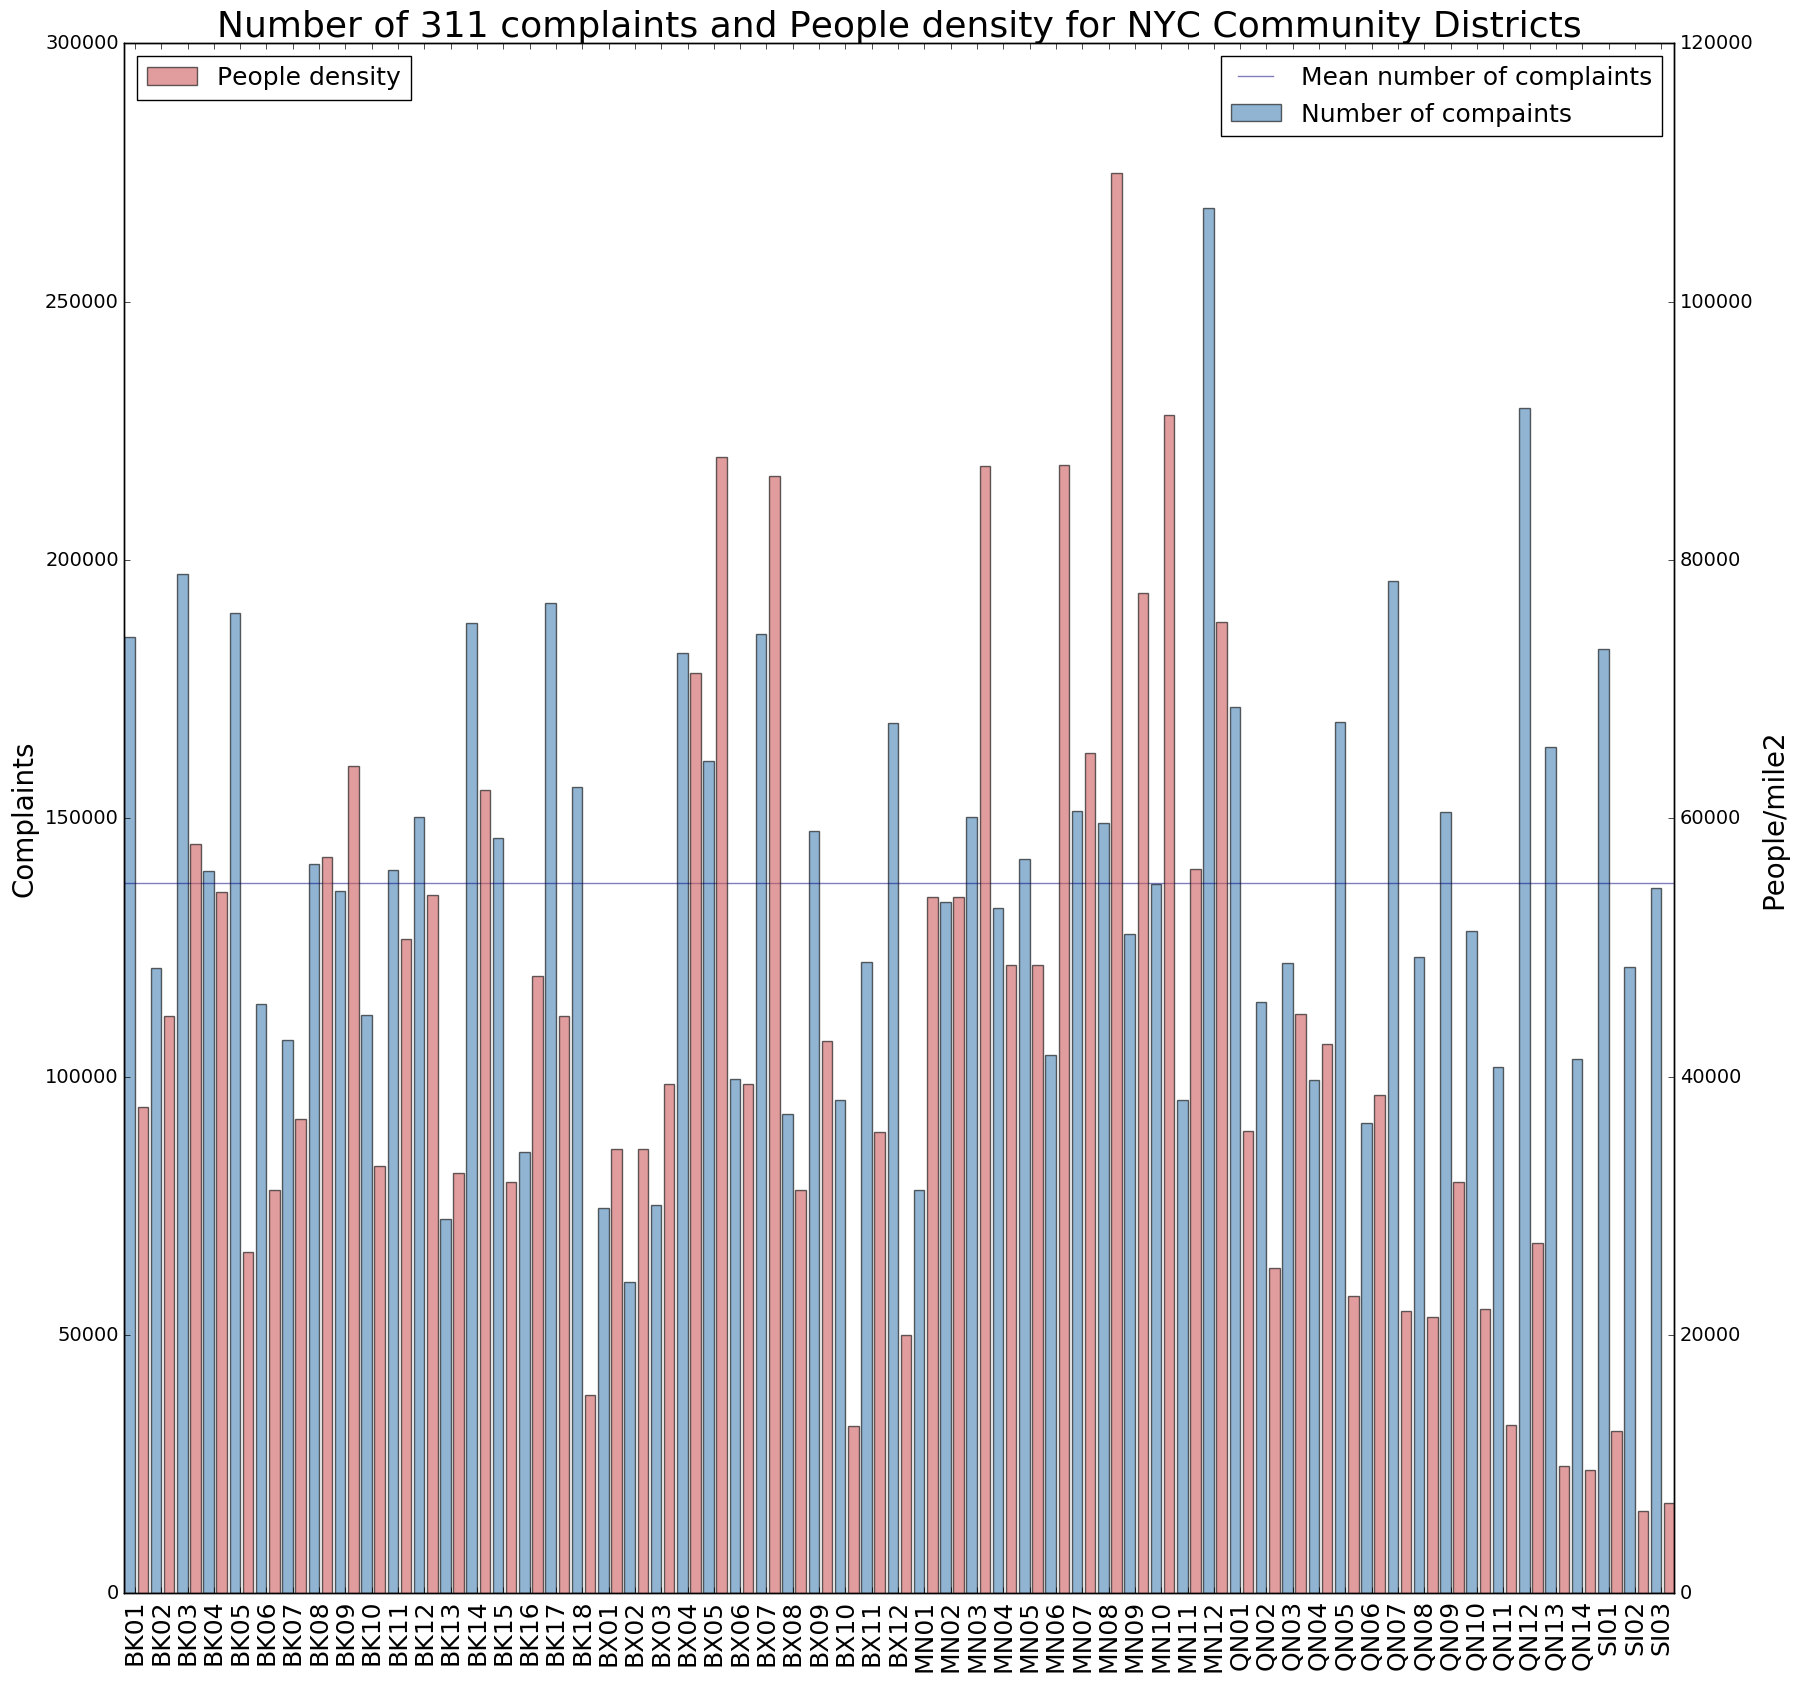

In [170]:
fig, ax1 = plt.subplots(figsize=(20,20), facecolor='white')
ax1.set_title('Number of 311 complaints and People density for NYC Community Districts', size = 26)
ax1.bar(np.arange(0,2*len(df_sorted.harm_name),2),df_sorted.Counts, color = 'steelblue', alpha = 0.6, label = 'Number of compaints')
ax1.set_xticks(np.arange(0.8,2*len(df_sorted.harm_name),2))
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(labels, rotation='vertical', size=18)
ax1.set_ylabel('Complaints', size=20)
ax1.axhline(y=df_sorted.Counts.mean(), color='navy', alpha=0.5, label = "Mean number of complaints")
ax1.legend(loc = 0, prop={'size':18})
ax2 = ax1.twinx()
ax2.bar(np.arange(1,2*len(df_sorted.harm_name),2),df_sorted['Population Density (per sq. mile)'], 
       color = 'indianred', alpha = 0.6, label = 'People density')
ax2.set_ylabel('People/mile2', size=20)
ax2.tick_params(labelsize=14)
ax2.legend(loc=2, prop={'size':18})

## Figure 1

Shows the total number of complaints (_light blue bar_) and people density (_light red bar_) per each NYC's community district. Usually, the areas with high people density, seem to have an above average number of 311 complaints. 

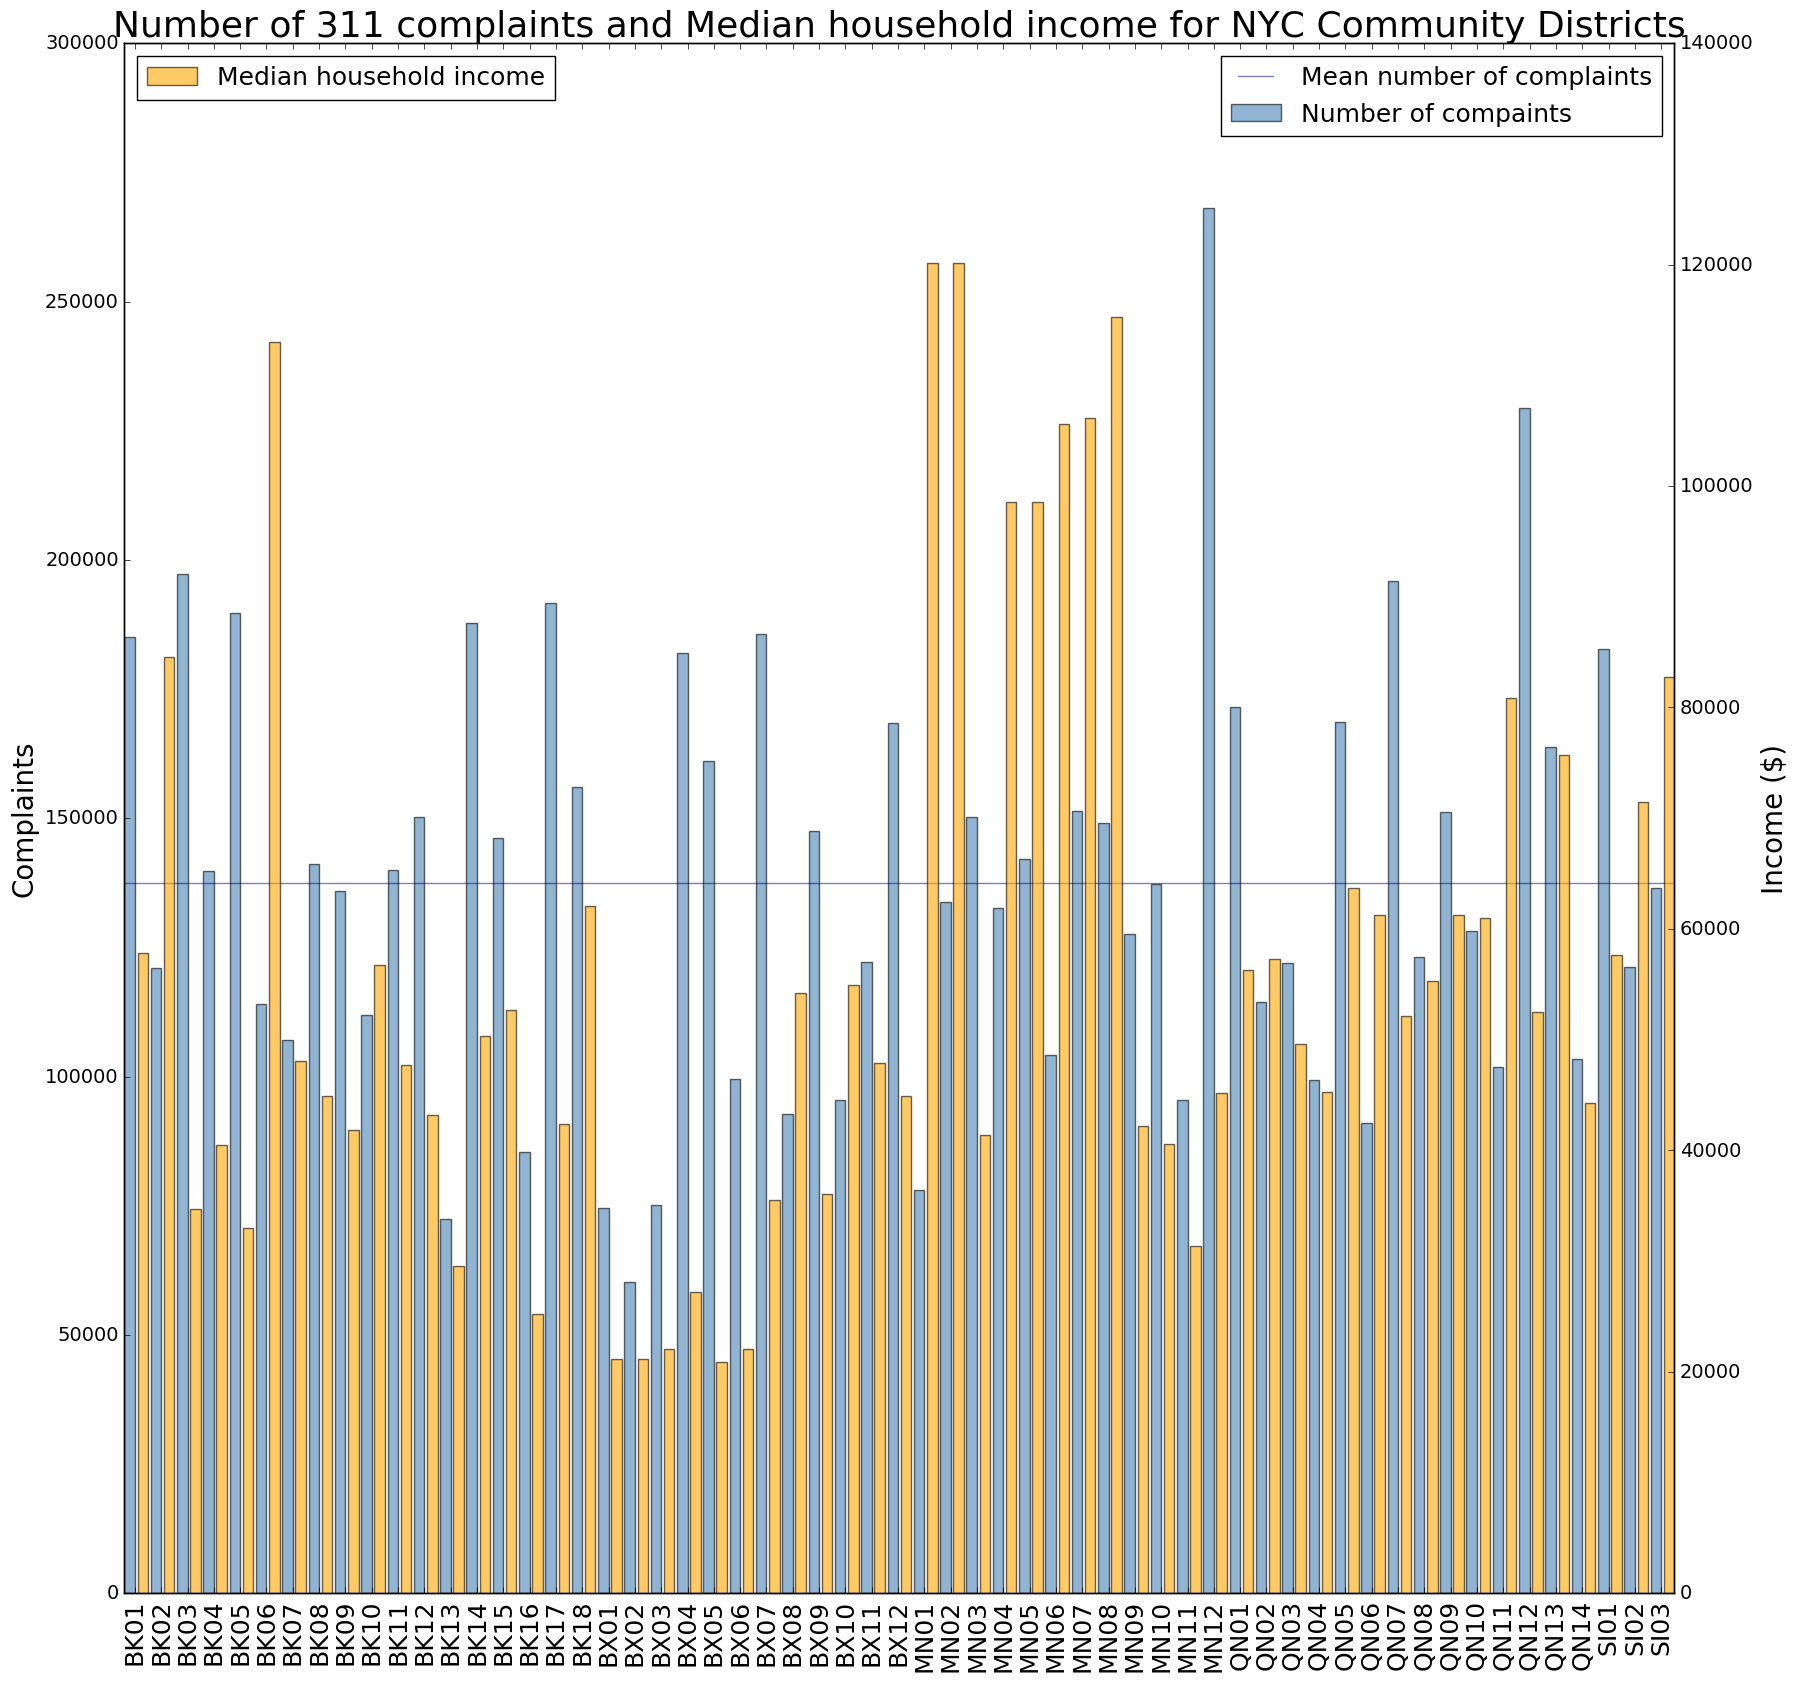

In [171]:
fig, ax1 = plt.subplots(figsize=(20,20), facecolor='white')
ax1.set_title('Number of 311 complaints and Median household income for NYC Community Districts', size = 26)
ax1.bar(np.arange(0,2*len(df_sorted.harm_name),2),df_sorted.Counts, color = 'steelblue', alpha = 0.6, label = 'Number of compaints')
ax1.set_xticks(np.arange(0.8,2*len(df_sorted.harm_name),2))
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(labels, rotation='vertical', size=18)
ax1.set_ylabel('Complaints', size=20)
ax1.axhline(y=df_sorted.Counts.mean(), color='navy', alpha=0.5, label = "Mean number of complaints")
ax1.legend(loc = 0, prop={'size':18})
ax2 = ax1.twinx()
ax2.bar(np.arange(1,2*len(df_sorted.harm_name),2),df_sorted['Median household income (In 2014 Inflation Adjusted Dollars)'], 
       color = 'orange', alpha = 0.6, label = 'Median household income')
ax2.set_ylabel('Income ($)', size=20)
ax2.tick_params(labelsize=14)
ax2.legend(loc=2, prop={'size':18})

## Figure 2

Shows the total number of complaints (_light blue bar_) and median household income (_yellow bar_) per each NYC's community district. We observe that some of the lowest income neighborhoods (e.g. BX05, BX07) have a highly above average number of complaints, that could be attributed to potential high criminal activity in the area or less resource allocation by the municipality. Also, the rich Manhattan areas, complaints are close to the average, suggesting that the idea of "rich people complaining more" does not hold much truth.

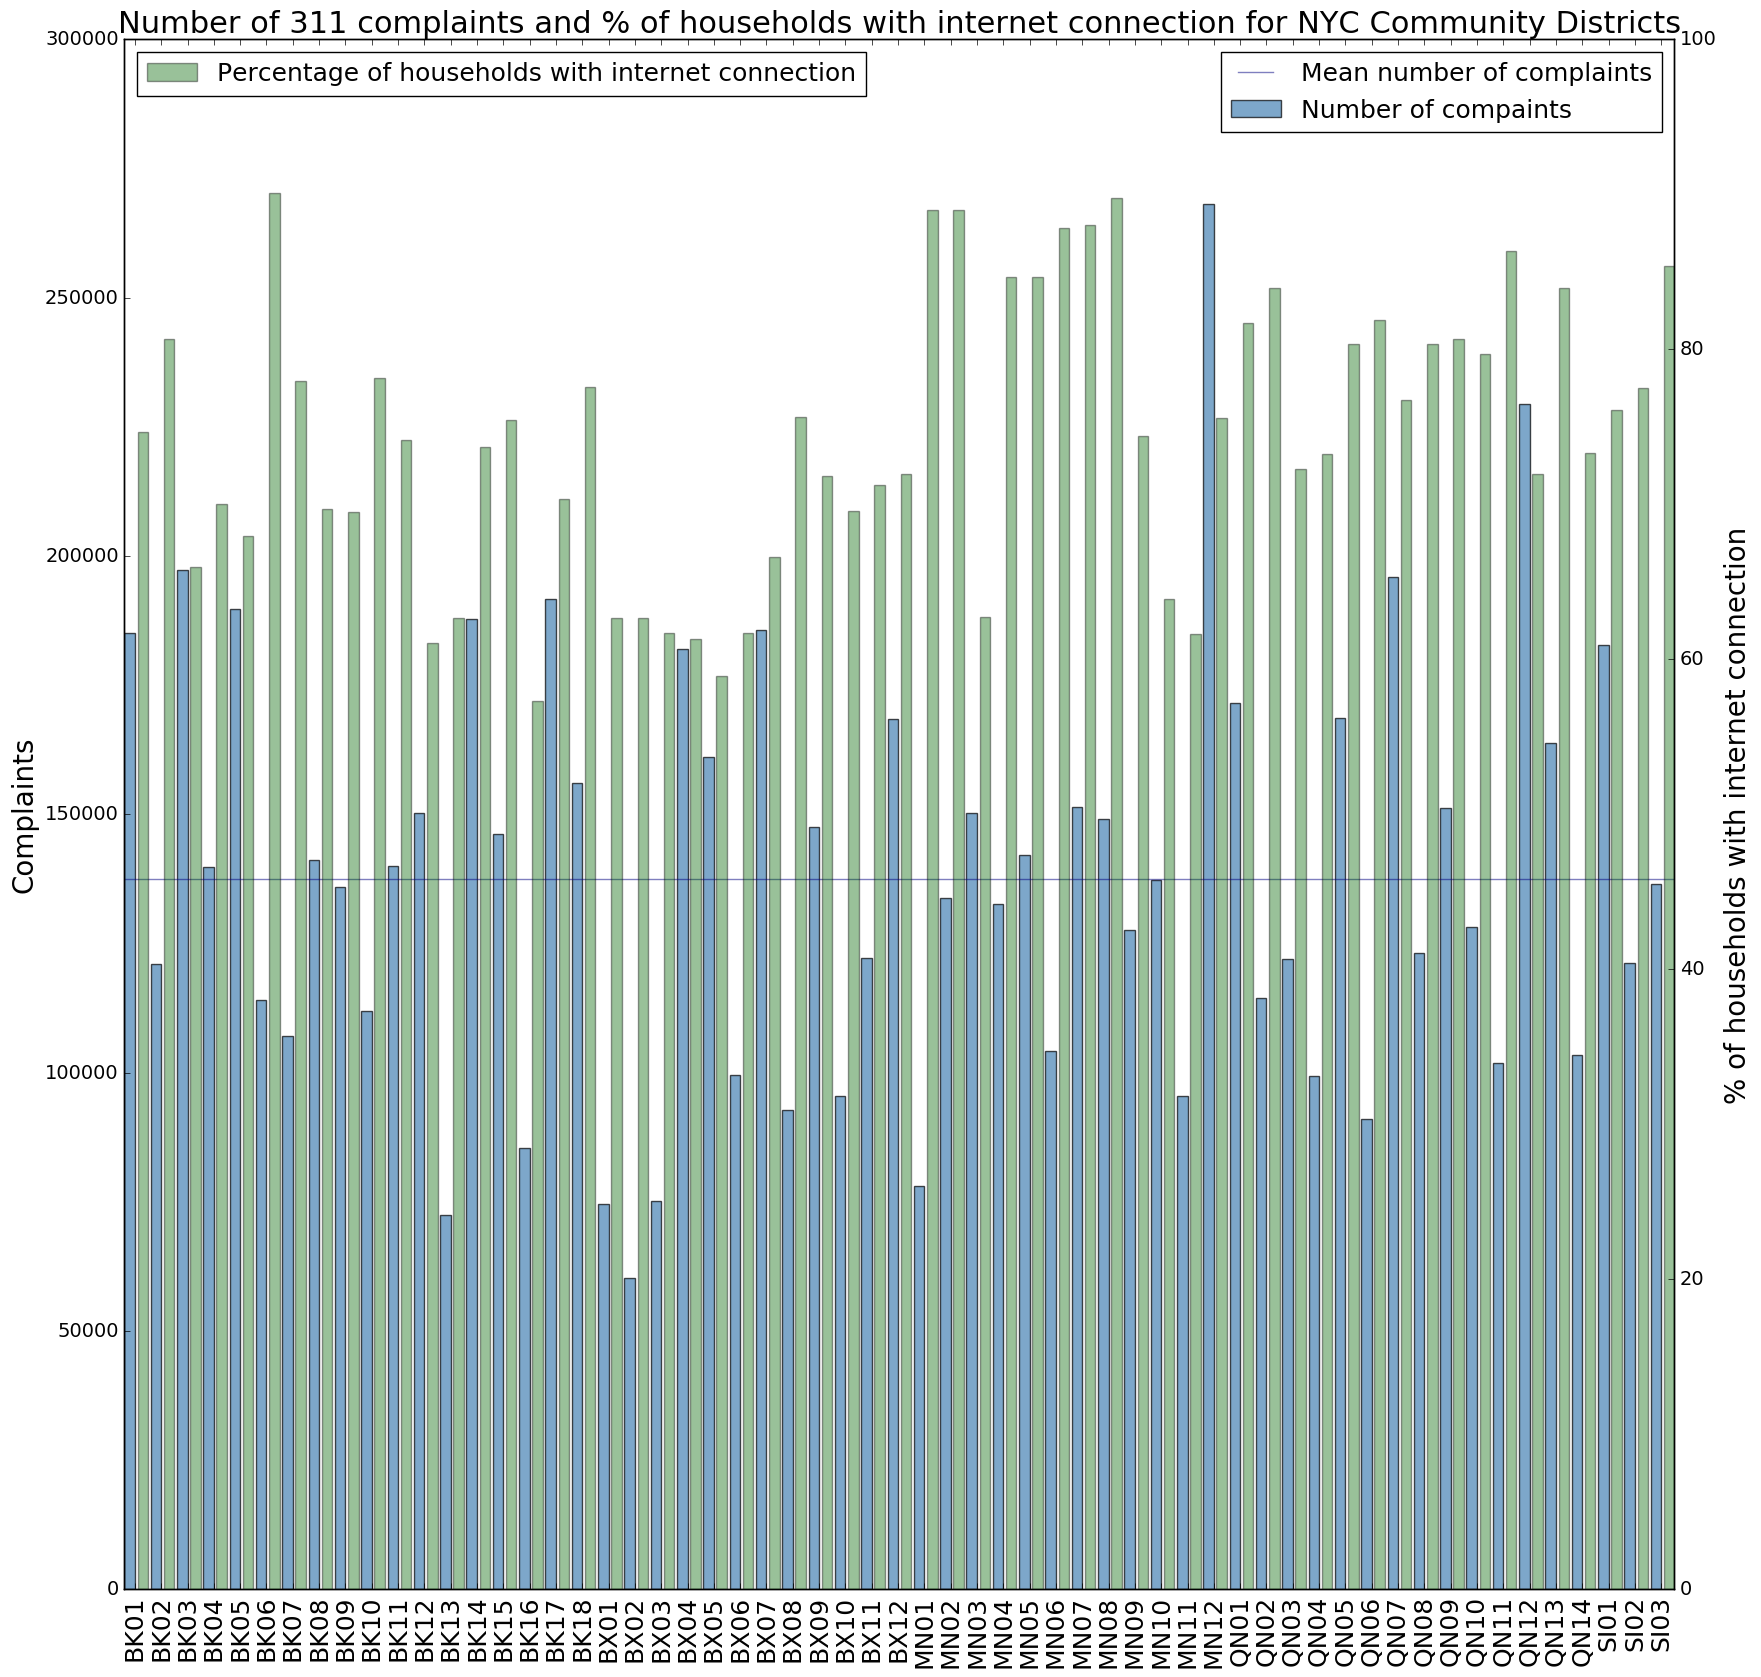

In [172]:
fig, ax1 = plt.subplots(figsize=(20,20), facecolor='white')
ax1.set_title('Number of 311 complaints and % of households with internet connection for NYC Community Districts', size = 22)
ax1.bar(np.arange(0,2*len(df_sorted.harm_name),2),df_sorted.Counts, color = 'steelblue', alpha = 0.7, label = 'Number of compaints')
ax1.set_xticks(np.arange(0.8,2*len(df_sorted.harm_name),2))
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(labels, rotation='vertical', size=18)
ax1.set_ylabel('Complaints', size=20)
ax1.axhline(y=df_sorted.Counts.mean(), color='navy', alpha=0.5, label = "Mean number of complaints")
ax1.legend(loc = 0, prop={'size':18})
ax2 = ax1.twinx()
ax2.bar(np.arange(1,2*len(df_sorted.harm_name),2),df_sorted['% Households: With An Internet Subscription'], 
       color = 'darkgreen', alpha = 0.4, label = 'Percentage of households with internet connection')
ax2.set_ylabel('% of households with internet connection', size=20)
ax2.tick_params(labelsize=14)
ax2.legend(loc=2, prop={'size':18})

## Figure 3

Shows the total number of complaints (_light blue bar_) and the percentage of households with internet connection (_green bar_) per each NYC's community district. We notice that areas with the lowest complaints, such as BX02, BX01 or BK13 are among the ones with the lowest percentage of households with internet connections. Such findings links the ability to file a complaint with the access one has to means of telecommunication. 

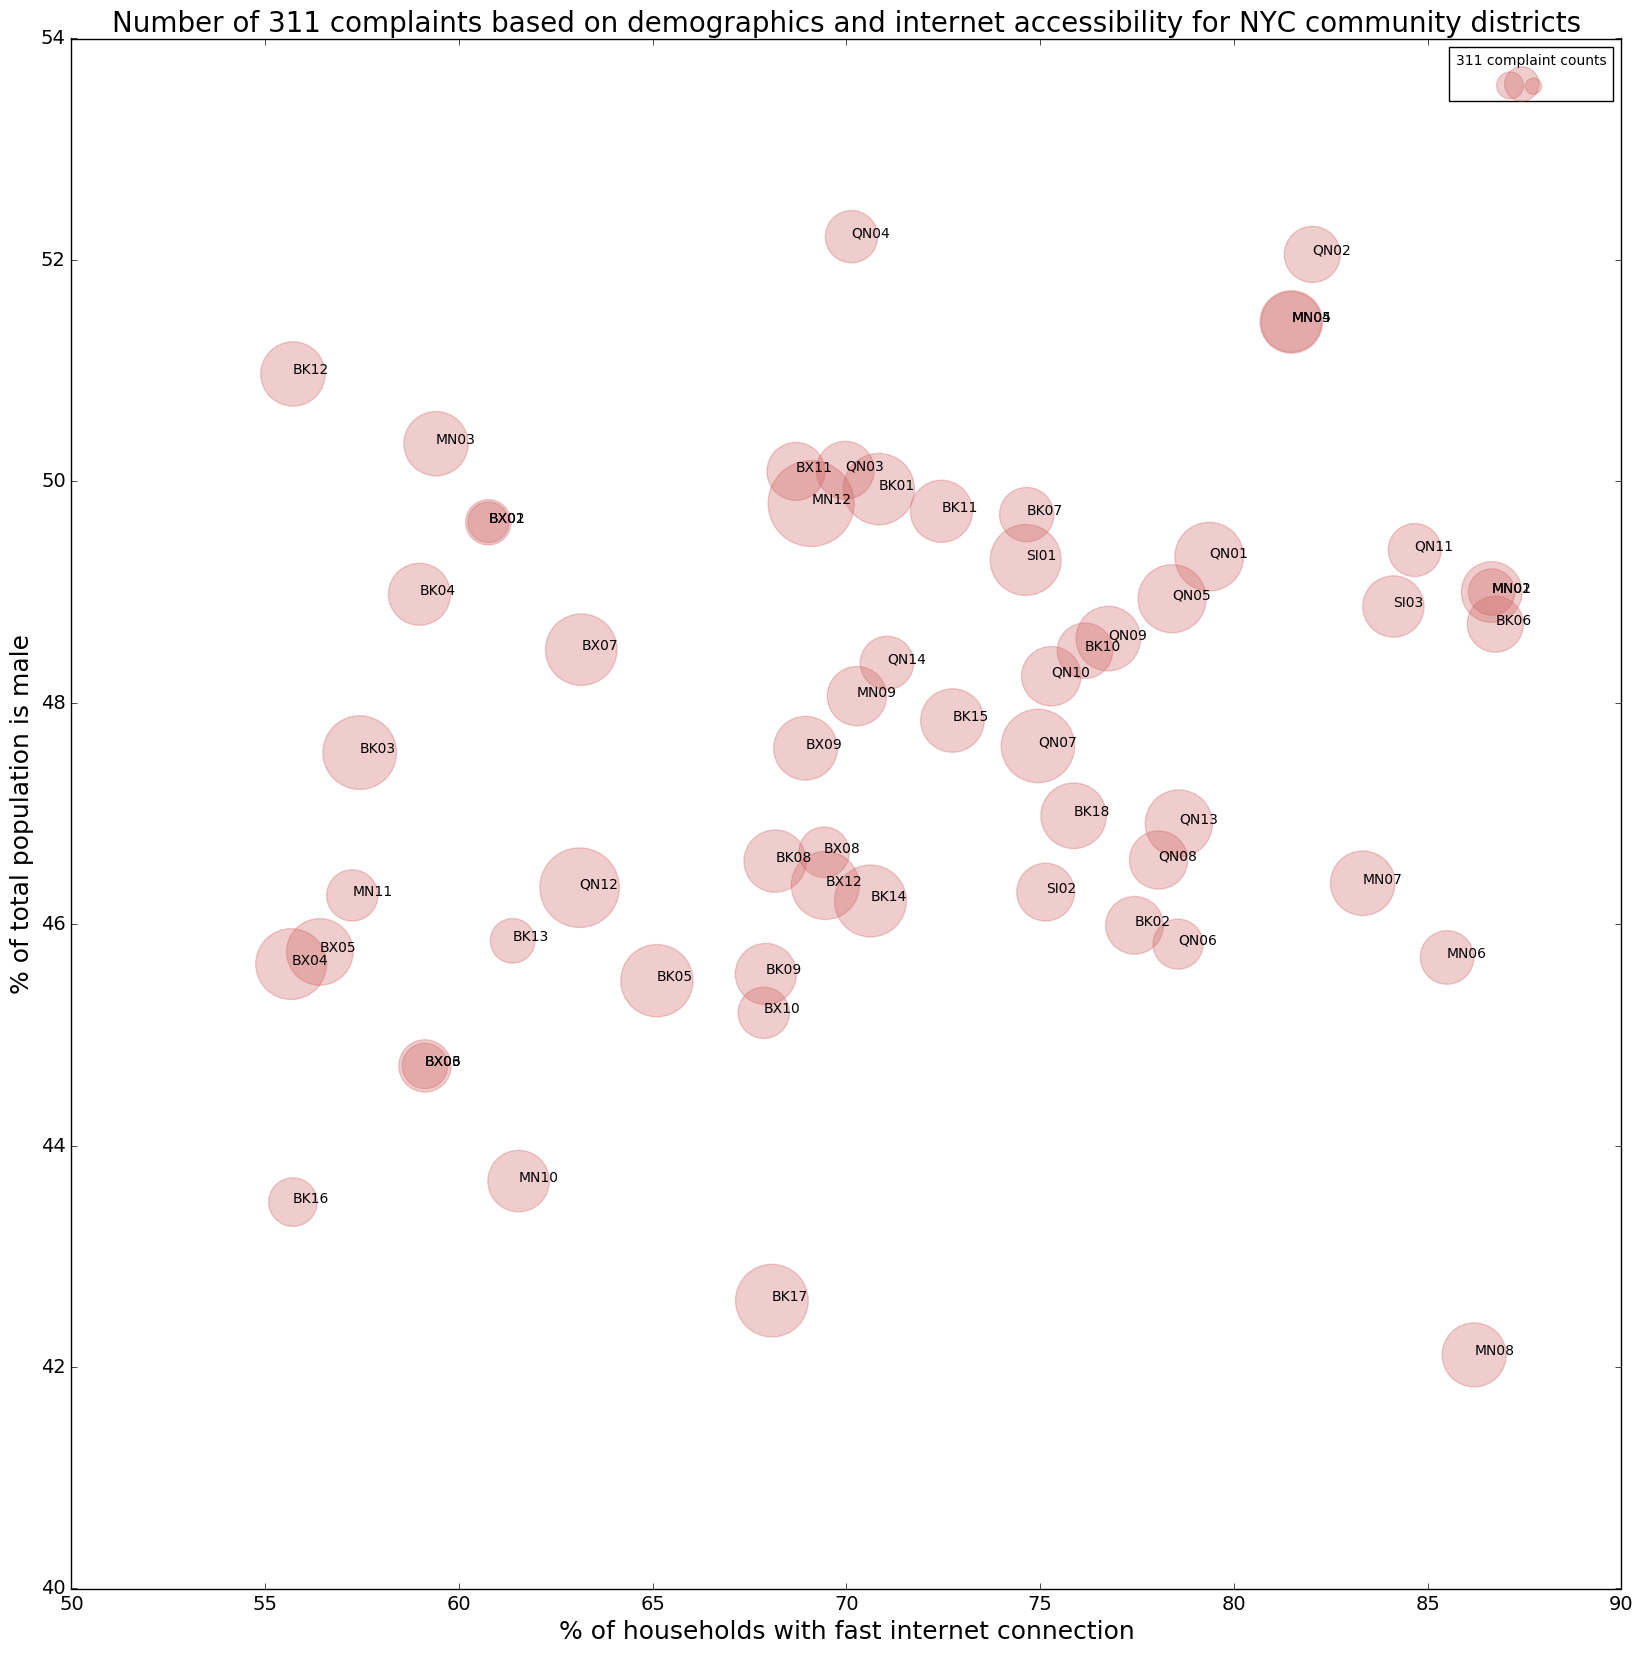

In [164]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(df_sorted['% fast connection'], df_sorted['% Total Population: Male'], color = 'indianred', alpha = 0.3,
          s = df_sorted.Counts/70)
ax.tick_params(labelsize=14)
ax.set_ylabel('% of total population is male', fontsize = 18)
ax.set_xlabel('% of households with fast internet connection', fontsize = 18)
ax.set_title('Number of 311 complaints based on demographics and internet accessibility for NYC community districts', size = 20)
for i, txt in enumerate(df_sorted.harm_name):
    ax.annotate(txt, (df_sorted['% fast connection'][i],df_sorted['% Total Population: Male'][i]))
ax.legend(' ',loc=0, markerscale=0.4, title = '311 complaint counts')

## Figure 4

Shows the percentage of male population in a community district versus the percentage of households with fast internet connection. To add another level of information, the size of the bubbles represents the total number of complaints in the district. We notice a positive correlation between the % of males and % of households with fast connection. Also, the number of complaints does not seem to be significantly affected by this two variables, since we cannot observe a trend in the bubble size change as each of this two variables change.

P.S. I kept trying to have the district name centered in the bubbles, but didnt find a way to do so. If you have done it before or know an efficient way to do so, feel free to share it with me! :)